# Getting started

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pumpkins_ds = pd.read_csv('./data/US-pumpkins3.csv')
pumpkins_ds.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins_ds.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

## Updating Datasets

In [3]:
column_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins_ds = pumpkins_ds.loc[:, column_to_select]

In [4]:
price = (pumpkins_ds['Low Price'] + pumpkins_ds['High Price']) / 2
month = pd.DatetimeIndex(pumpkins_ds['Date']).month

In [5]:
new_pumpkins_ds = pd.DataFrame({'Month': month, 'Package': pumpkins_ds['Package'], 'Low Price': pumpkins_ds['Low Price'],'High Price': pumpkins_ds['High Price'], 'Price': price})

In [6]:
pumpkins_ds = pumpkins_ds[pumpkins_ds['Package'].str.contains('bushel',case=True, regex=True)]

In [7]:
pumpkins_ds.head()

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.0,15.0,9/24/16
71,1 1/9 bushel cartons,18.0,18.0,9/24/16
72,1 1/9 bushel cartons,18.0,18.0,10/1/16
73,1 1/9 bushel cartons,17.0,17.0,10/1/16
74,1 1/9 bushel cartons,15.0,15.0,10/8/16


# Plotting

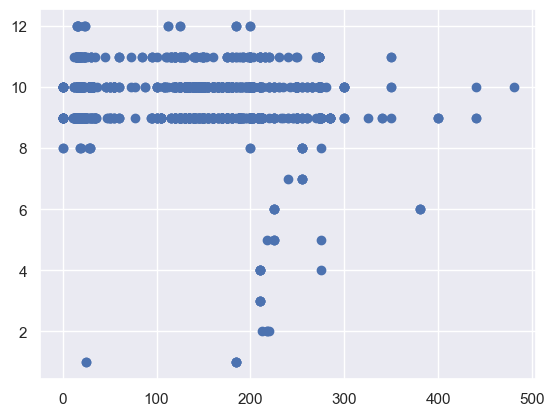

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

price = new_pumpkins_ds.Price
month = new_pumpkins_ds.Month

plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

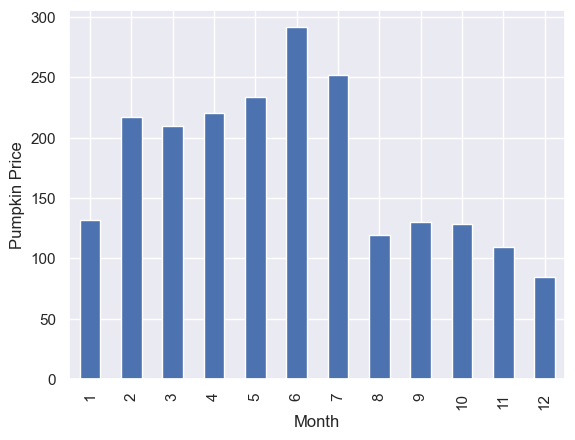

In [9]:
new_pumpkins_ds.groupby(['Month'])['Price'].mean().plot(kind='bar')

plt.ylabel("Pumpkin Price")